In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importing Models and Metrics

In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

#Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv('data/stud.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [29]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [39]:
X = df.drop(columns = ['reading_score', 'total_score'], axis=1)

In [20]:
y = df['total_score']

In [40]:
pd.DataFrame(X)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,69,88
2,female,group B,master's degree,standard,none,90,93
3,male,group A,associate's degree,free/reduced,none,47,44
4,male,group C,some college,standard,none,76,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,95
996,male,group C,high school,free/reduced,none,62,55
997,female,group C,high school,free/reduced,completed,59,65
998,female,group D,some college,standard,completed,68,77


In [22]:
pd.DataFrame(y)

,total_score
0,218
1,247
2,278
3,148
4,229
...,...
995,282
996,172
997,195
998,223


In [41]:
num_feature = [feature for feature in X.columns if df[feature].dtype != 'O']
cat_feature = [feature for feature in X.columns if df[feature].dtype == 'O']

In [42]:
num_feature, cat_feature

(['math_score', 'writing_score'],
 ['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'])

#Onehot Encoding and Scalling 

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [43]:
oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_feature),
        ('StandardScaler',numeric_transformer, num_feature),
    ]
)

In [44]:
X = preprocessor.fit_transform(X)

In [48]:
X.shape

(1000, 19)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [47]:
X_train.shape

(800, 19)

In [68]:
def evaluate_model(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    return mae, rmse, r2
# def evaluate_model(true, predicted):
#     mae = mean_absolute_error(true, predicted)
#     mse = mean_squared_error(true, predicted)
#     rmse = np.sqrt(mean_squared_error(true, predicted))
#     r2_square = r2_score(true, predicted)
#     return mae, rmse, r2_square


In [69]:
models = {
     "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    # model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.8737
- Mean Absolute Error: 3.1281
- R2 Score: 0.9916
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3121
- Mean Absolute Error: 3.4920
- R2 Score: 0.9904


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.2214
- Mean Absolute Error: 3.4219
- R2 Score: 0.9901
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.6348
- Mean Absolute Error: 3.6940
- R2 Score: 0.9889




Ridge
Model performance for Training set
- Root Mean Squared Error: 3.8722
- Mean Absolute Error: 3.1227
- R2 Score: 0.9916
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.3028
- Mean Absolute Error: 3.4864
- R2 Score: 0.9904


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9.8478
- Mean Absolute Error: 7.6332
- R2 Score: 0.9460
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 12.4608
- Mean Absolute Error: 9.4070
- R2 Score: 0.9195


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.9907
- Mean Absolute Error: 5.3700
- R2 Score: 0.9747


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1.8344
- Mean Absolute Error: 1.3895
- R2 Score: 0.9981
--------

In [71]:
model_list, r2_list

(['Linear Regression',
  'Lasso',
  'Ridge',
  'K-Neighbors Regressor',
  'Decision Tree',
  'Random Forest Regressor',
  'XGBRegressor',
  'CatBoosting Regressor',
  'AdaBoost Regressor'],
 [0.9903622573945297,
  0.9888655222421305,
  0.9904038702089255,
  0.9195190626481917,
  0.9746695574574207,
  0.9848247526783173,
  0.9849797196003446,
  0.9811858690794399,
  0.9770768272839215])

In [72]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.990404
0,Linear Regression,0.990362
1,Lasso,0.988866
6,XGBRegressor,0.984980
5,Random Forest Regressor,0.984825
7,CatBoosting Regressor,0.981186
8,AdaBoost Regressor,0.977077
4,Decision Tree,0.974670
3,K-Neighbors Regressor,0.919519


Text(0, 0.5, 'Predicted')

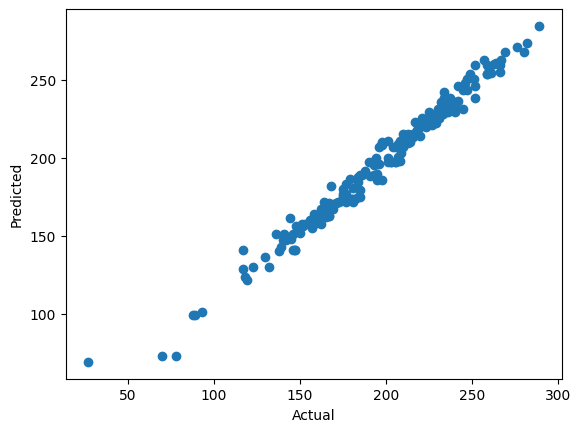

In [73]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='total_score'>

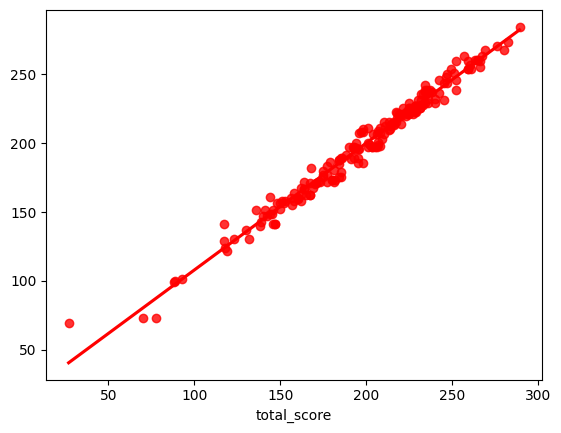

In [74]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red')

From the r2 score, Lasso and Liner Regression are best performers.

In [75]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)
y_pred_LR = regressor.predict(X_test)

score = r2_score(y_test, y_pred_LR)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.04


<Axes: xlabel='total_score'>

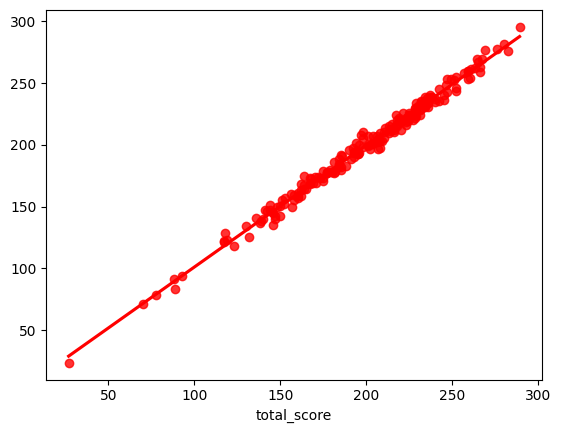

In [76]:
sns.regplot(x=y_test,y=y_pred_LR,ci=None,color ='red')